In [26]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df= pd.read_csv('Data/insurance - insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Hypothesis

    
Null hypothesis - No appreciable difference in insurance charges between smokers and non smokers

Alternative hypothesis - Smokers have higher percentages of insurance charges than non smokers.

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
sample = df.sample(n=50, random_state = 42)

In [6]:
smoker_charges = sample.loc[sample['smoker']== 'yes', 'charges'].copy()
non_smoker_charges = sample.loc[sample['smoker']== 'no', 'charges'].copy()

In [7]:
#smoker_charges = smoker['charges']
#non_smoker_charges = non_smoker['charges']

In [8]:
print(f"For smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For Females (n={len(non_smoker_charges)}): Mean={np.mean(non_smoker_charges):.2f}")

For smokers (n=11): Mean=35439.40
For Females (n=39): Mean=7309.48


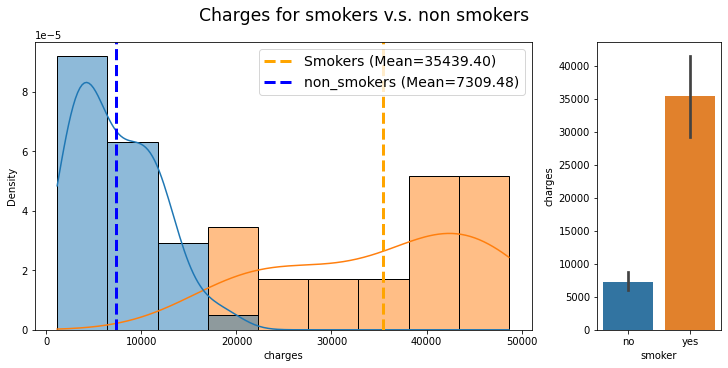

In [9]:
#gender_palette={'smoker':'dodgerblue', 'non_smoker':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=sample, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  )

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})", color = 'orange')

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"non_smokers (Mean={np.mean(non_smoker_charges):.2f})", color = 'b')

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=sample, x='smoker',y='charges',ax = ax_bar)
fig.suptitle('Charges for smokers v.s. non smokers',fontsize='xx-large');

In [10]:
zscores_s = stats.zscore(smoker_charges)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [11]:
zscores_ns = stats.zscore(non_smoker_charges)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

0

In [12]:
result_s = stats.normaltest(smoker_charges)
result_s

C:\Users\Steven (Dad)\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=2.209358578032982, pvalue=0.331317122245031)

In [13]:
result_ns = stats.normaltest(non_smoker_charges)
result_ns

NormaltestResult(statistic=2.6262187199374125, pvalue=0.26898239167805005)

In [14]:
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=18.397400827816167, pvalue=8.621214599569032e-05)

In [15]:
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=8.55920795211359, pvalue=3.4904271993679644e-06)

# Reject the null hypothesis

# Hypothesis
    
Null hypothesis - neither men or women are more likely to smoke

Alternative hypothesis - men are more or less likely to smoke than women

Text(0.5, 1.0, 'Number of men who do and do not smoke v.s. women')

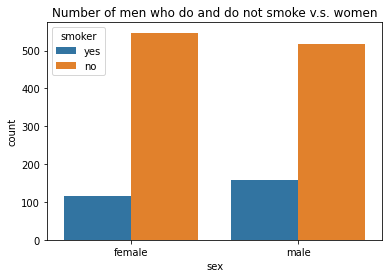

In [16]:
ax = sns.countplot(data=df, x='sex', hue = 'smoker')
ax.set_title('Number of men who do and do not smoke v.s. women')

In [17]:
table = pd.crosstab(df['sex'], df['smoker'])
table


smoker,no,yes
sex,,
female,547,115
male,517,159


In [18]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [19]:
print(p)
p,.05

0.006548143503580696


(0.006548143503580696, 0.05)

# Reject the null hypothesis

# Hypothesis
Null hypothesis - Different regions do not have different charges on average

alternate hypothesis - some regions have more or less charges on average

<AxesSubplot:xlabel='region', ylabel='charges'>

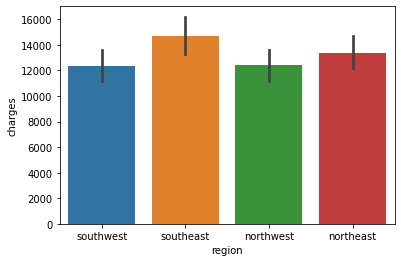

In [20]:
sns.barplot(data=df, x='region', y='charges')

In [21]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [22]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [23]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [24]:
stats.levene(groups['southwest'],
            groups['southeast'],
            groups['northwest'],
            groups['northeast'])

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [25]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
regions = df['region']
charges = df['charges']
tukeys_results = pairwise_tukeyhsd(charges, regions)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


# Reject the null hypothesis